# Analyse  prédictive  à  partir  du  modele  de  régression  linéaire avec le module sklearn
# Dans cet exercice, on cherche à prédire la progression du diabète, une mesure quantitative de la progression de la maladie sur an 

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
#On importe les datas et le modèle 
from sklearn import datasets, linear_model
#On importe les metrics pour évaluer nos résultat
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
#Charger la base de donnée return_X_y permet de séparer data et target
print(diabetes_X)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


In [93]:
diab = datasets.load_diabetes()

diab.data
print(diab)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [96]:
data=diab.data
columns=diab.feature_names
pd.DataFrame(data=data, columns=columns)
pd.DataFrame(data=diab.data, columns=diab.feature_names)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [52]:
print(diab.DESCR)
# "Dix variables de référence, l'âge, le sexe, l'indice de masse corporelle, la pression artérielle moyenne et six mesures de sérum sanguin 
# obtenues pour chacun des n = 442 patients diabétiques
# une mesure quantitative de la progression de la maladie sur un an 
# Remarque: Chacune de ces 10 variables de caractéristiques 
# centrée sur la moyenne et mise à l'échelle par l'écart-type multiplié par «n_samples» 
#(c'est-à-dire que la somme des carrés de chaque colonne totalise 1).

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [53]:
# Affichage du type de donnée qu'est notre variable "diab"
print(type(diab)) 
# Ce n'est pas un DataFrame, mais une sorte de dictionnaire

<class 'sklearn.utils.Bunch'>


In [54]:
# Affichage des éléments contenu dans "diab"
print(dir(diab))

['DESCR', 'data', 'data_filename', 'feature_names', 'target', 'target_filename']


In [55]:
# Affichage de la colonne feature_names 
diab.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [56]:
# affichage des 5 premières observations 
print(diabetes_X[:5,:])
print(diabetes_y[:5])

[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02269202 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187235  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03199144 -0.04664087]]
[151.  75. 141. 206. 135.]


In [57]:
# data = diab

In [58]:
# type(data) -> permet de savoir de quel type est la variable data, dans notre cas il s'agit d'un tableau(array)
# data.ndim -> permet de savoir : Number of array dimensions. (150) 
# data.shape -> permet de savoir le nombre d'élément des tableaux dimentionnels (4 éléments par tableau)
# type(data), data.ndim, data.shape

In [59]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [60]:
# Création d'un variable "target" reprenant le contenu de diab.target
target = diab.target # Les labels associés à chaque enregistrement
target 

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [61]:
# Création dataframe qui prends des variables sous forme de columns , remplis 
#avec les valeurs data de mon dataset'diabetes' 
df = pd.DataFrame(columns=diab["feature_names"], data=diab.data)
# rajoute une column tu mets comme titre 'target', comme valeurs 'target'
df["target"] = diab.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


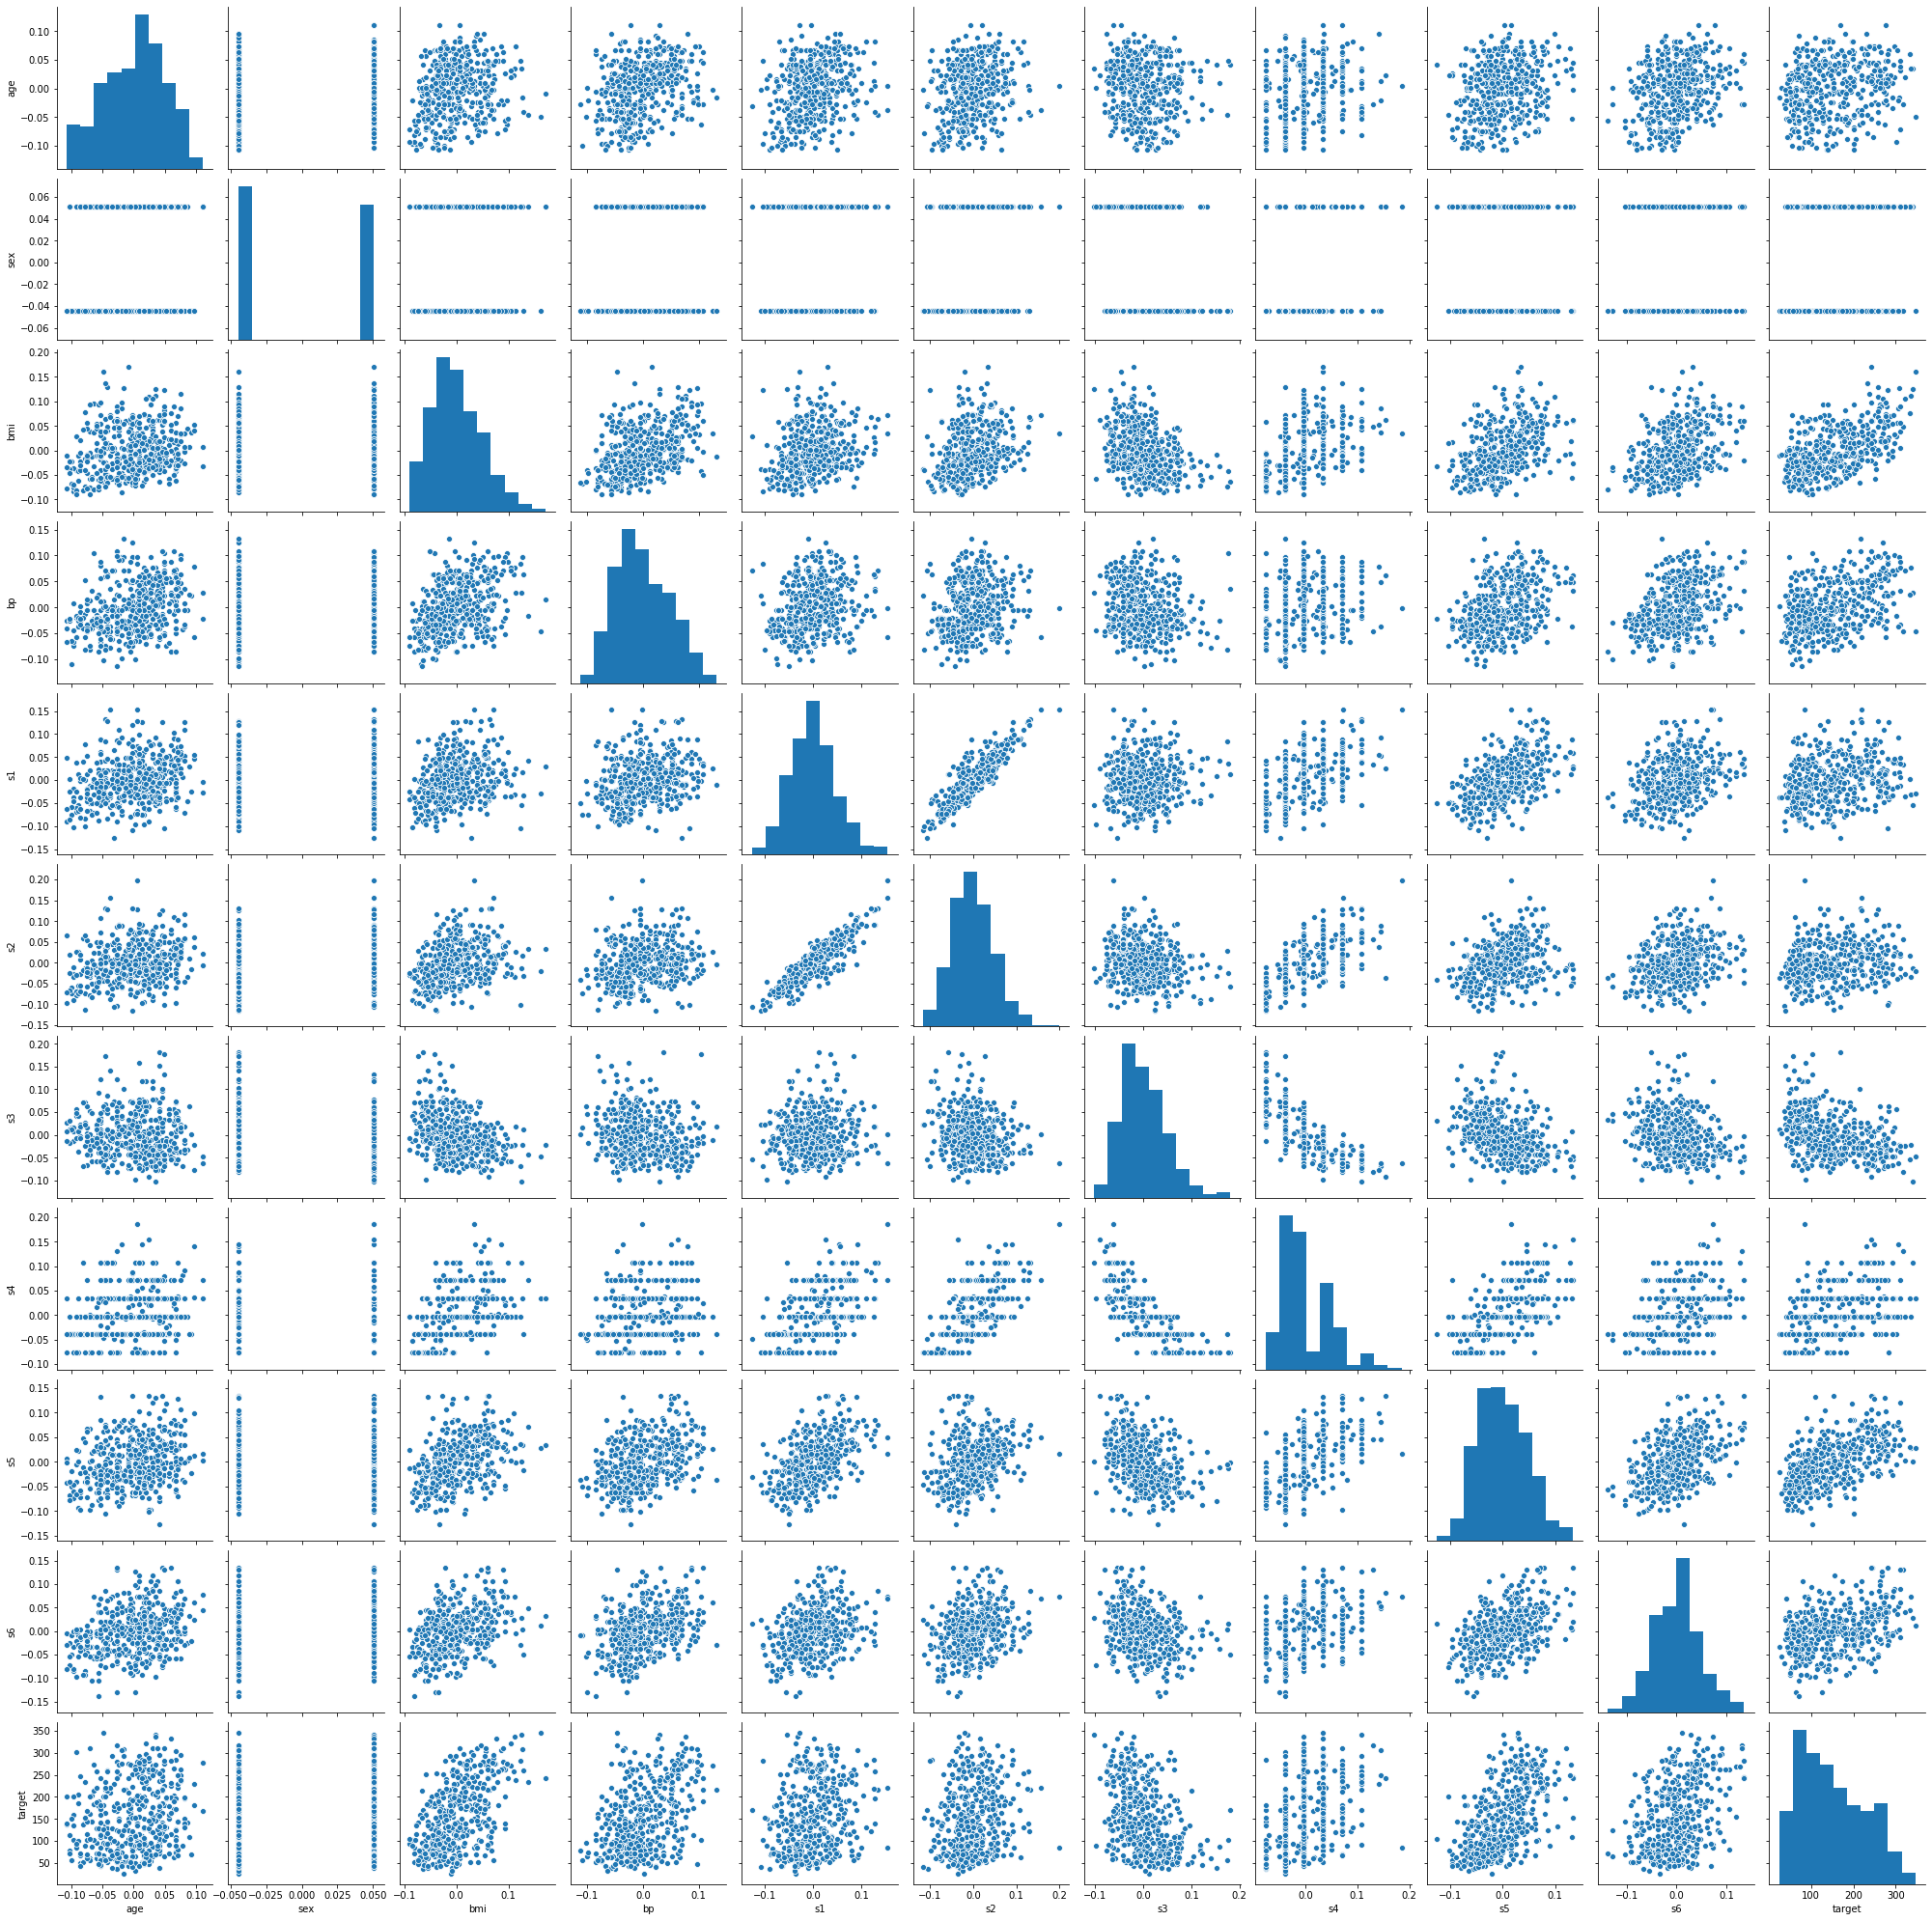

In [62]:
sns.pairplot(df, height=2.5);

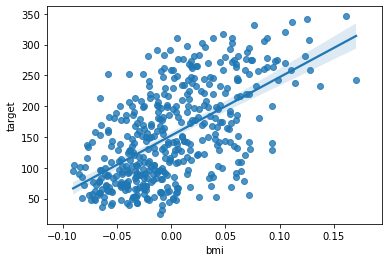

In [63]:
sns.regplot(x="bmi", y="target", data=df);

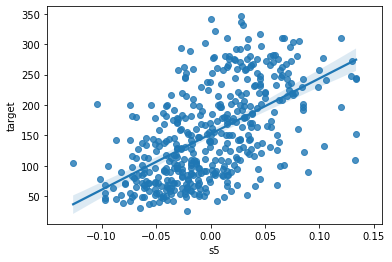

In [64]:
sns.regplot(x="s5", y="target", data=df);


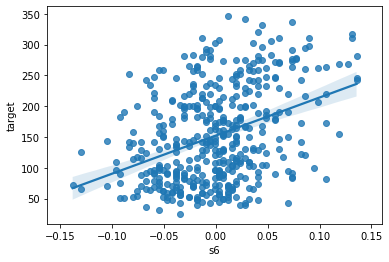

In [65]:
sns.regplot(x="s6", y="target", data=df);

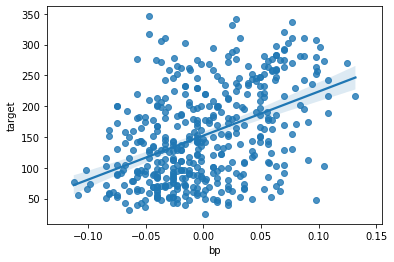

In [66]:
sns.regplot(x="bp", y="target", data=df);

In [67]:
# Extraction d'un array à plusieurs  dimensions  
# (où  chaque  liste  contient  qu'un  seul  élements égal au troisième élément des listes intiales)
diabetes_X=diabetes_X[ :, np.newaxis, 2]
#print(diabetes_X)
#on isole une seule colonne (La 3eme)
#df_bmi=features.bmi features['bmi']

In [68]:
print(diabetes_X)
# Notons ici que les données sont déjà sous format verticale.

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0.06548562]
 [ 0.12528712]
 [-0.05039625]
 [-0.06332999]
 [-0.03099563]
 [ 0.02289497]
 [ 0.01103904]
 [ 0.07139652]
 [ 0.01427248]
 [-0.00836158]
 [-0.06764124]
 [-0.0105172 ]
 [-0.02345095]
 [ 0.06816308]
 [-0.03530688]
 [-0.01159501]
 [-0.0730303 ]
 [-0.04177375]
 [ 0.01427248]
 [-0.00728377]
 [ 0.0164281 ]
 [-0.00943939]
 [-0.01590626]
 [ 0.0250506 ]
 [-0.04931844]
 [ 0.04121778]
 [-0.06332999]
 [-0.06440781]
 [-0.02560657]
 [-0.00405033]
 [ 0.00457217]
 [-0.00728377]
 [-0.0374625 ]
 [-0.02560657]
 [-0.02452876]
 [-0.01806

In [69]:
# Nous allons scinder cette base en un échantillon apprentissage et un échantillon de validation
diabetes_X_train = diabetes_X[:-20]
#  Echantillon  d'apprentissage (sélectionner tous les éléments avant le 20ième élement à partir de la gauche (exclu))
diabetes_X_test = diabetes_X[-20:]
# Echantillon  de  validation (sélectionner  tous  les  élement  après  à  partir  du  20ième  élement  à partir de la gauche  (inclusiement))



In [70]:
print(diabetes_X_train)

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0.06548562]
 [ 0.12528712]
 [-0.05039625]
 [-0.06332999]
 [-0.03099563]
 [ 0.02289497]
 [ 0.01103904]
 [ 0.07139652]
 [ 0.01427248]
 [-0.00836158]
 [-0.06764124]
 [-0.0105172 ]
 [-0.02345095]
 [ 0.06816308]
 [-0.03530688]
 [-0.01159501]
 [-0.0730303 ]
 [-0.04177375]
 [ 0.01427248]
 [-0.00728377]
 [ 0.0164281 ]
 [-0.00943939]
 [-0.01590626]
 [ 0.0250506 ]
 [-0.04931844]
 [ 0.04121778]
 [-0.06332999]
 [-0.06440781]
 [-0.02560657]
 [-0.00405033]
 [ 0.00457217]
 [-0.00728377]
 [-0.0374625 ]
 [-0.02560657]
 [-0.02452876]
 [-0.01806

In [71]:
# Scinder  la  table  target  en  échantillon  d'apprentissage  et  de  validation  de  la  même  dimension que la table  diabetes_X_train et diabetes_X_test
diabetes_y_train= diabetes_y[:-20]
diabetes_y_test= diabetes_y[-20:]
#On split nos données de test et de training

In [72]:
print(diabetes_X_train[:5])  # rappel: les données ont été préalablement normalisées

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]]


In [73]:
regr = linear_model.LinearRegression()
#on charge le modèle dans une variable


In [74]:
# Estimation   du   modèle   sur   l'échantillon   d'apprentissage   
# avec   comme   variable   explicative  diabetes_X_train et variable expliquée diabetes_y_train
regr.fit(diabetes_X_train, diabetes_y_train)
#On entraine le modèle


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
diabetes_y_pred = regr.predict(diabetes_X_test)
#Première prédiction en utilisant les data de test

In [76]:
print('Coefficients: \n', regr.coef_)

#??? Que signifie ce coef ? Prend il nos données en paramètre
#D'une certaine manière ? 

Coefficients: 
 [938.23786125]


In [77]:
print('Mean_squared_error: %.2f'
      %mean_squared_error(diabetes_y_test, diabetes_y_pred))
#On utilise la méthode des mean_squared_error comme indicateur
#de performance plus le résultat est bas meilleurs est le modèle


Mean_squared_error: 2548.07


In [78]:
print('Coefficient of determination: %.2f'
     % r2_score(diabetes_y_test, diabetes_y_pred))
#On récupére un coefficient de determination pour évaluer
#Le modèle. Il ressort un % avec 0.47 on peut dire que le modèle 
#N'est pas forcément très performant.



Coefficient of determination: 0.47


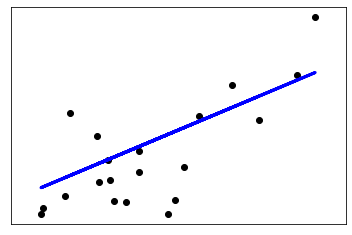

In [79]:
plt.scatter(diabetes_X_test, diabetes_y_test, color= 'black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth= 3)
plt.xticks(())
plt.yticks(())
plt.show()
#On compare nos target de test avec notre régression.


In [80]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

In [82]:
X, y = datasets.load_diabetes(return_X_y=True)

# Train classifiers
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

reg1.fit(X, y)
reg2.fit(X, y)
reg3.fit(X, y)

ereg = VotingRegressor([('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg.fit(X, y)

VotingRegressor(estimators=[('gb',
                             GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                    

In [83]:
xt = X[:20]

pred1 = reg1.predict(xt)
pred2 = reg2.predict(xt)
pred3 = reg3.predict(xt)
pred4 = ereg.predict(xt)

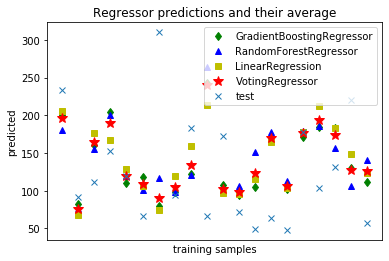

In [85]:
plt.figure()
plt.plot(pred1, 'gd', label='GradientBoostingRegressor')
plt.plot(pred2, 'b^', label='RandomForestRegressor')
plt.plot(pred3, 'ys', label='LinearRegression')
plt.plot(pred4, 'r*', ms=10, label='VotingRegressor')
plt.plot(diabetes_y_test, "x" , label="test" )
plt.tick_params(axis='x', which='both', bottom=False, top=False, 
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')

plt.show()


# Autres Méthodes

In [4]:
datasets.load_diabetes()

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [11]:
print(datasets.load_diabetes().DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [12]:
dir(datasets.load_diabetes())

['DESCR',
 'data',
 'data_filename',
 'feature_names',
 'target',
 'target_filename']

In [13]:
print(type(datasets.load_diabetes))

<class 'function'>


In [16]:
diab = datasets.load_diabetes()

In [38]:
df = pd.DataFrame(data=diab.data, columns=diab['feature_names'] )
# rajoute une column tu mets comme titre 'target', comme valeurs 'target'
df["target"] = diab.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [22]:
# affichage correlélation en tableau equivalent heatmap
conf=df.corr()
conf


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


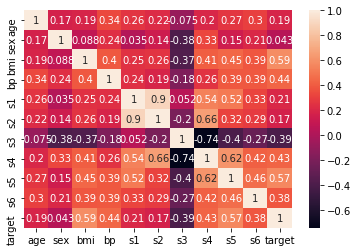

In [26]:
# Affiche directement avec la fonction 'df.corr()' , ligne 22
sns.heatmap(conf, square=False, annot=True, cbar=True)

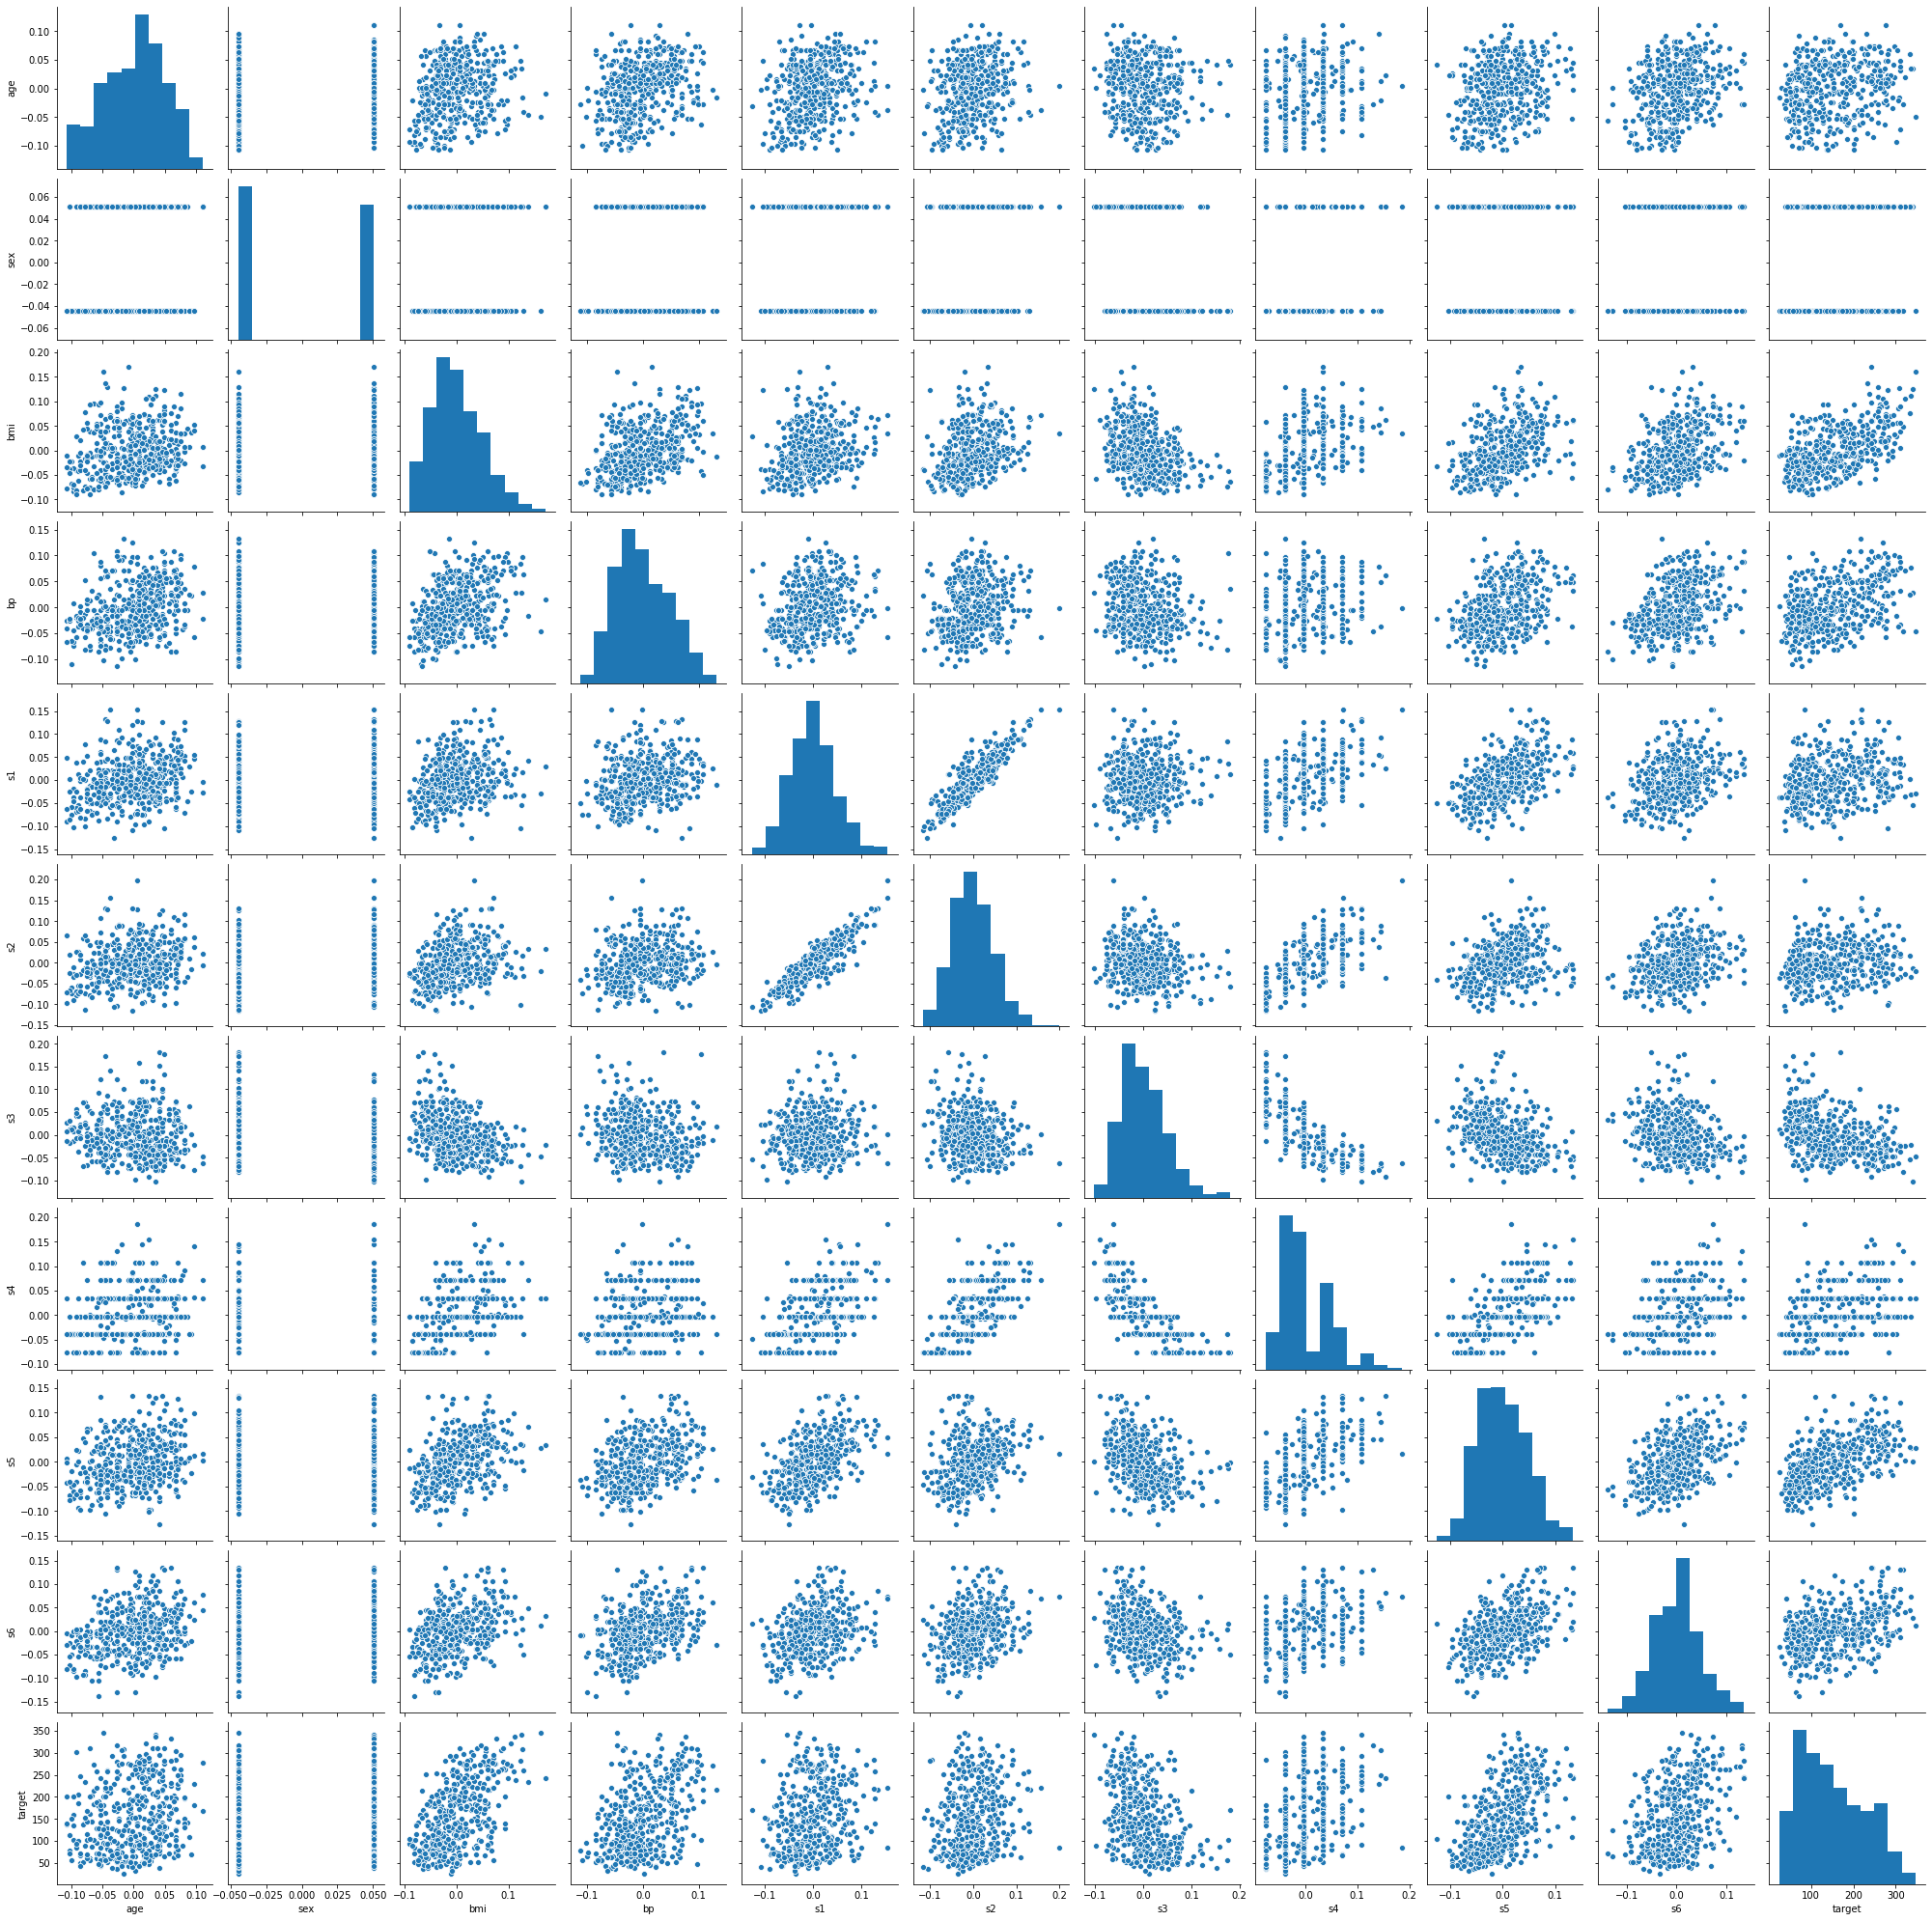

In [27]:
sns.pairplot(df, height=2.5);

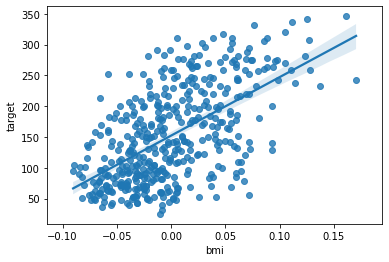

In [28]:
sns.regplot(x="bmi", y="target", data=df);

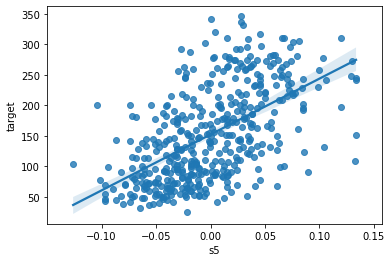

In [66]:
sns.regplot(x="s5", y="target", data=df);

In [34]:
dfBMI = df[['bmi']]
dfBMI.head()

,bmi
0,0.061696
1,-0.051474
2,0.044451
3,-0.011595
4,-0.036385


In [36]:
from sklearn.linear_model import LogisticRegression

In [40]:
from sklearn.model_selection import train_test_split # version 0.18.1
# split the data with 50% in each set
# la fonction split permet de supprimer des valeurs d'un tableau, en l'occurence 50% pour chacun de nos tableau

data_test = train_test_split(dfBMI, diab.target
                                 , random_state=0 # test de façon aléatoire "random"
                                 , train_size=0.5)
data_train, data_test, target_train, target_test = data_test


In [41]:
data_test[:5]

,bmi
362,0.104809
249,0.060618
271,0.008883
435,-0.023451
400,0.045529


In [42]:
regr = linear_model.LinearRegression()
#on charge le modèle dans une variable


In [43]:
# Estimation   du   modèle   sur   l'échantillon   d'apprentissage   
# avec   comme   variable   explicative  diabetes_X_train et variable expliquée diabetes_y_train
regr.fit(data_train, target_train)
#On entraine le modèle


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Exemple avec 2 variables

In [80]:
dfBMIS5 = df[['bmi', 's5']]
dfBMIS5.head()

,bmi,s5
0,0.061696,0.019908
1,-0.051474,-0.068330
2,0.044451,0.002864
3,-0.011595,0.022692
4,-0.036385,-0.031991


In [81]:
from sklearn.model_selection import train_test_split # version 0.18.1
# split the data with 50% in each set
# la fonction split permet de supprimer des valeurs d'un tableau, en l'occurence 50% pour chacun de nos tableau

data_test = train_test_split(dfBMIS5, diab.target
                                 , random_state=0 # test de façon aléatoire "random"
                                 , train_size=0.5)
data_train, data_test, target_train, target_test = data_test

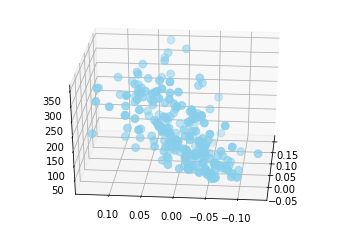

In [82]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d')
#ax.plot(data_test3['bmi'], data_test3['s5'], result, c='red', zorder=10)
ax.scatter(data_train['bmi'], data_train['s5'], target_train, c='skyblue', s=60, zorder=8)

ax.view_init(30, 185)
plt.show()

In [44]:
diab_pred = regr.predict(data_test)
#Première prédiction en utilisant les data de test

In [45]:
print('Coefficients: \n', regr.coef_)

#??? Que signifie ce coef ? Prend il nos données en paramètre
#D'une certaine manière ? 

Coefficients: 
 [1057.05653012]


In [46]:
print('Mean_squared_error: %.2f'
      %mean_squared_error(target_test, diab_pred))
#On utilise la méthode des mean_squared_error comme indicateur
#de performance plus le résultat est bas meilleurs est le modèle


Mean_squared_error: 3736.39


In [47]:
print('Coefficient of determination: %.2f'
     % r2_score(target_test, diab_pred))
#On récupére un coefficient de determination pour évaluer
#Le modèle. Il ressort un % avec 0.47 on peut dire que le modèle 
#N'est pas forcément très performant.



Coefficient of determination: 0.32


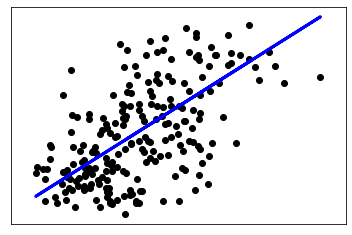

In [49]:
plt.scatter(data_test, target_test, color= 'black')
plt.plot(data_test, diab_pred, color='blue', linewidth= 3)
plt.xticks(())
plt.yticks(())
plt.show()
#On compare nos target de test avec notre régression.

In [51]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

In [52]:
X, y = datasets.load_diabetes(return_X_y=True)

# Train classifiers
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

reg1.fit(X, y)
reg2.fit(X, y)
reg3.fit(X, y)

ereg = VotingRegressor([('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg.fit(X, y)

VotingRegressor(estimators=[('gb',
                             GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                    

In [53]:
xt = X[:20]

pred1 = reg1.predict(xt)
pred2 = reg2.predict(xt)
pred3 = reg3.predict(xt)
pred4 = ereg.predict(xt)

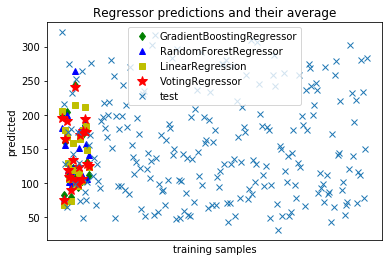

In [62]:
plt.figure()
plt.plot(pred1, 'gd', label='GradientBoostingRegressor')
plt.plot(pred2, 'b^', label='RandomForestRegressor')
plt.plot(pred3, 'ys', label='LinearRegression')
plt.plot(pred4, 'r*', ms=10, label='VotingRegressor')
plt.plot(target_test, "x" , label="test" )
plt.tick_params(axis='x', which='both', bottom=False, top=False, 
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')

plt.show()


# Test split avec 's5'

In [59]:
dfs5 = df[['s5']]
dfs5.head()

,s5
0,0.019908
1,-0.068330
2,0.002864
3,0.022692
4,-0.031991


In [60]:
from sklearn.model_selection import train_test_split # version 0.18.1
# split the data with 50% in each set
# la fonction split permet de supprimer des valeurs d'un tableau, en l'occurence 50% pour chacun de nos tableau

data_test = train_test_split(dfs5, diab.target
                                 , random_state=0 # test de façon aléatoire "random"
                                 , train_size=0.5)
data_train, data_test, target_train, target_test = data_test